In [1]:
import numpy as np,sys
from matplotlib import pyplot as plt
import pandas as pd
import cv2


### Let's load our images

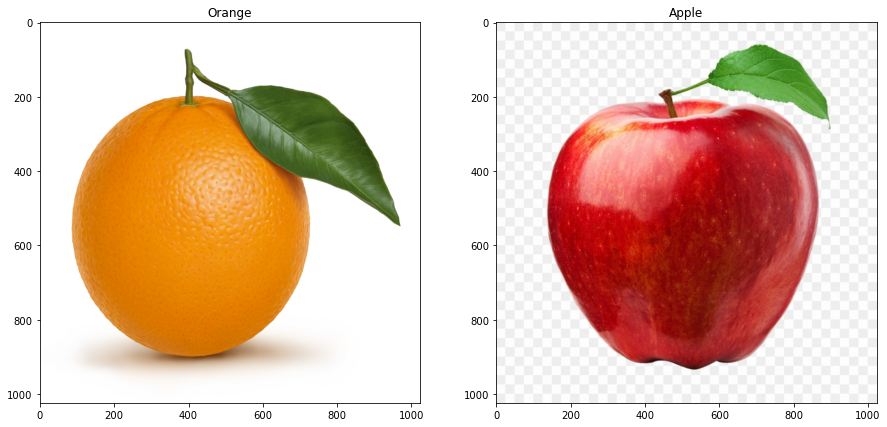

In [2]:
img_size=(1024,1024)
img1= cv2.imread(r"C:\Users\fhvgmana\Documents\Spring 2021\Computer vision\\orange.jpg")
img2= cv2.imread(r"C:\Users\fhvgmana\Documents\Spring 2021\Computer vision\\apple.jpg")
img1=cv2.resize(img1,img_size)
img1= image = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2=cv2.resize(img2,img_size)
img2=image = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 13))
ax[0].imshow(img1,cmap='gray')
ax[0].set_title('Orange')
ax[1].imshow(img2)
ax[1].set_title("Apple")
plt.show()


### Laplacian pyramid
we will use two libraries, cv2.pyrup() and cv2.pyrdown() for up-sampling and down-sampling respectively

In [6]:

# generate Gaussian pyramid for A
def smooth_and_downsamnple(img,level):
    image=img.copy()
    down_samples=[image]
    for i in range(level):
        image= cv2.pyrDown(image)
        down_samples.append(image)
    return down_samples

down_sampled1=smooth_and_downsamnple(img1,6)
down_sampled2=smooth_and_downsamnple(img2,6)
    
def laplacian_pyramid(down_arr):
    lap_pyr=[down_arr[-1]]
    for i in range(len(down_arr)-1,0,-1):
        up_sampled=cv2.pyrUp(down_arr[i])
        l=cv2.subtract(down_arr[i-1],up_sampled)
        lap_pyr.append(l)
    return lap_pyr
laplacian1=laplacian_pyramid(down_sampled1)
laplacian2=laplacian_pyramid(down_sampled2)
laplacian1.reverse()

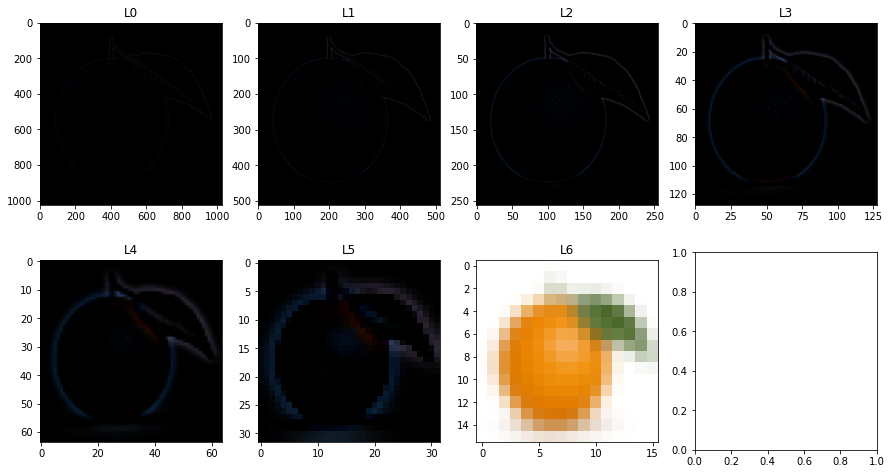

In [7]:
titles=["L0","L1","L2","L3","L4","L5","L6","L7"]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,8))
for ax, l, t, in zip(axes.flatten(), laplacian1,titles):
    ax.set_title(t)
    ax.imshow(l)
    

### Pyramid Recocnstruction